In [11]:
import astropaint

from astropaint.lib import profile

import healpy as hp 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import rcParams
#%config InlineBackend.figure_format = "retina"

rcParams["figure.figsize"] = (10,7)
rcParams["text.usetex"] = True
rcParams["font.size"] = 18
rcParams["font.family"] = "stix"
rcParams["figure.dpi"]= 200

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Catalog

The `Catalog` object reads/simulates a halo catalog. The initial catalog must contain the following columns: 

`x` , `y`, `z`, `v_x`, `v_y`, `v_z`, `M_200c`

Instantiating the class without any input will simulate a set of randomly distributed halos

In [2]:
catalog = astropaint.Catalog()

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


Extra parameters such as halo radius, distance, etc. can be build using the `.build_dataframe()` method which runs automatically when the catalog data are updated.  

The data frame is stored in the `.data` attribute. 

In [4]:
catalog.data.head()

,x,y,z,v_x,v_y,v_z,M_200c,D_c,lat,lon,...,R_200c,c_200c,R_th_200c,rho_s,R_s,v_r,v_th,v_ph,v_lat,v_lon
0,-55.125404,6.582273,83.173691,5.956368,-24.474957,86.684311,9.864219e+13,99.999997,56.277579,173.190811,...,0.974192,4.062749,33.490248,1.737029e+14,0.239786,67.204062,-55.457271,23.596116,55.457271,23.596116
1,-3.733083,77.450020,63.147121,-30.239464,-11.585784,36.390053,1.080570e+14,100.000002,39.158749,92.759515,...,1.004248,4.026982,34.523516,1.703372e+14,0.249380,15.134943,-34.605101,30.762184,34.605101,30.762184
2,66.142921,34.132996,-66.783623,8.414516,18.595606,-11.620680,2.266002e+10,99.999999,-41.900283,27.295956,...,0.059664,9.157644,2.051088,1.150643e+15,0.006515,19.673556,-2.039523,12.666191,2.039523,12.666191
3,-70.789650,-61.549480,34.648045,-42.236294,-36.519611,-62.673534,3.646519e+14,100.000000,20.272194,221.005982,...,1.506317,3.578836,51.783364,1.315063e+14,0.420896,30.661401,78.137144,-0.153631,-78.137144,-0.153631
4,-15.230068,75.885948,63.319569,12.367790,-3.986341,-78.244423,5.094182e+14,99.999999,39.286290,101.348316,...,1.683895,3.464638,57.888054,1.225738e+14,0.486023,-54.452727,56.544778,-11.341584,-56.544778,-11.341584


In [7]:
catalog.data.columns

Index(['x', 'y', 'z', 'v_x', 'v_y', 'v_z', 'M_200c', 'D_c', 'lat', 'lon',
       'theta', 'phi', 'D_a', 'R_200c', 'c_200c', 'R_th_200c', 'rho_s', 'R_s',
       'v_r', 'v_th', 'v_ph', 'v_lat', 'v_lon'],
      dtype='object')

new random catalogs can be created using the `generate_random_halos()` method. If `put_on_shell` is `True` the halos will be distributed over a shell, otherwise they are uniformly distributed in a cubic box. 

In [161]:
catalog.data = catalog.generate_random_box(n_tot=1000,
                                           box_size=30,
                                           mass_min=1E14,
                                           mass_max=1E15,
                                           put_on_shell=True)

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [162]:
catalog.build_dataframe()
catalog.data.head()

Building the dataframe...

Done!


,x,y,z,v_x,v_y,v_z,M_200c,D_c,lat,lon,...,R_200c,c_200c,R_th_200c,rho_s,R_s,v_r,v_th,v_ph,v_lat,v_lon
0,-3.811226,-25.967922,14.530712,76.710548,18.678608,-75.472260,7.307677e+14,30.000000,28.970358,261.650497,...,1.899109,3.345472,217.621913,1.136564e+14,0.567666,-62.469052,51.681863,73.185129,-51.681863,73.185129
1,-13.351792,-22.722471,14.332442,57.599094,-36.050297,46.962456,3.494653e+14,29.999999,28.538429,239.561377,...,1.485109,3.593634,170.180943,1.326918e+14,0.413261,24.106246,-40.348172,67.923971,40.348172,67.923971
2,-21.322374,20.713184,-4.039841,-87.119926,36.286736,63.671116,3.957636e+14,29.999999,-7.739038,135.830287,...,1.547992,3.550526,177.386874,1.292563e+14,0.435990,78.399880,-74.910863,34.676234,74.910863,34.676234
3,26.973000,11.697669,5.968401,-52.974052,-33.516407,-73.176826,2.959338e+14,30.000000,11.475373,23.445446,...,1.405039,3.652062,161.005633,1.374361e+14,0.384725,-75.256054,59.392112,-9.672181,-59.392112,-9.672181
4,19.036524,-1.629694,23.129091,-2.781702,-29.720758,50.763557,2.054987e+14,30.000000,50.441048,355.106909,...,1.244209,3.783568,142.575827,1.484878e+14,0.328845,38.986558,-32.512197,-29.849714,32.512197,-29.849714


Let's put these halos on a canvas!

# Canvas 

The `Canvas` object locates the halo centers and extents on a healpy map. We can initialize it by feeding in a `Catalog` object and an `nside` for the map. 

In [163]:
canvas = astropaint.Canvas(catalog,
                           nside = 256,
                           analyze=False)

Let's check out the locations of the halos with a scatter plot

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


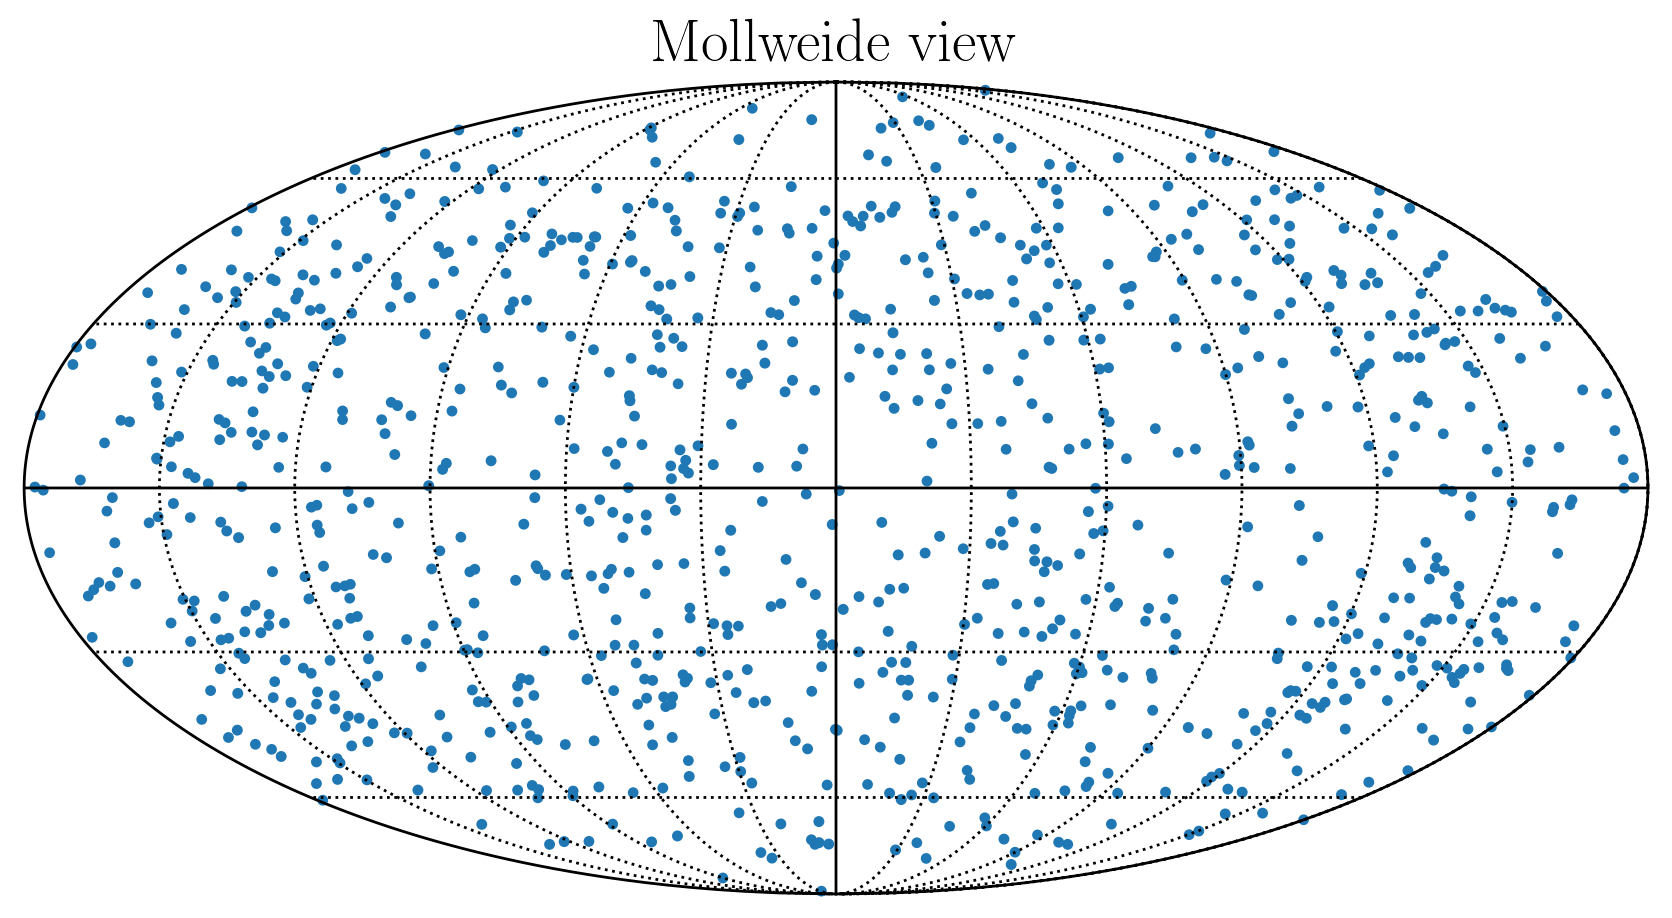

In [166]:
canvas.show_halo_centers("mollview",
                        marker='.',
                        )

and in cartesian projection

0.0 135.5224878140701 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


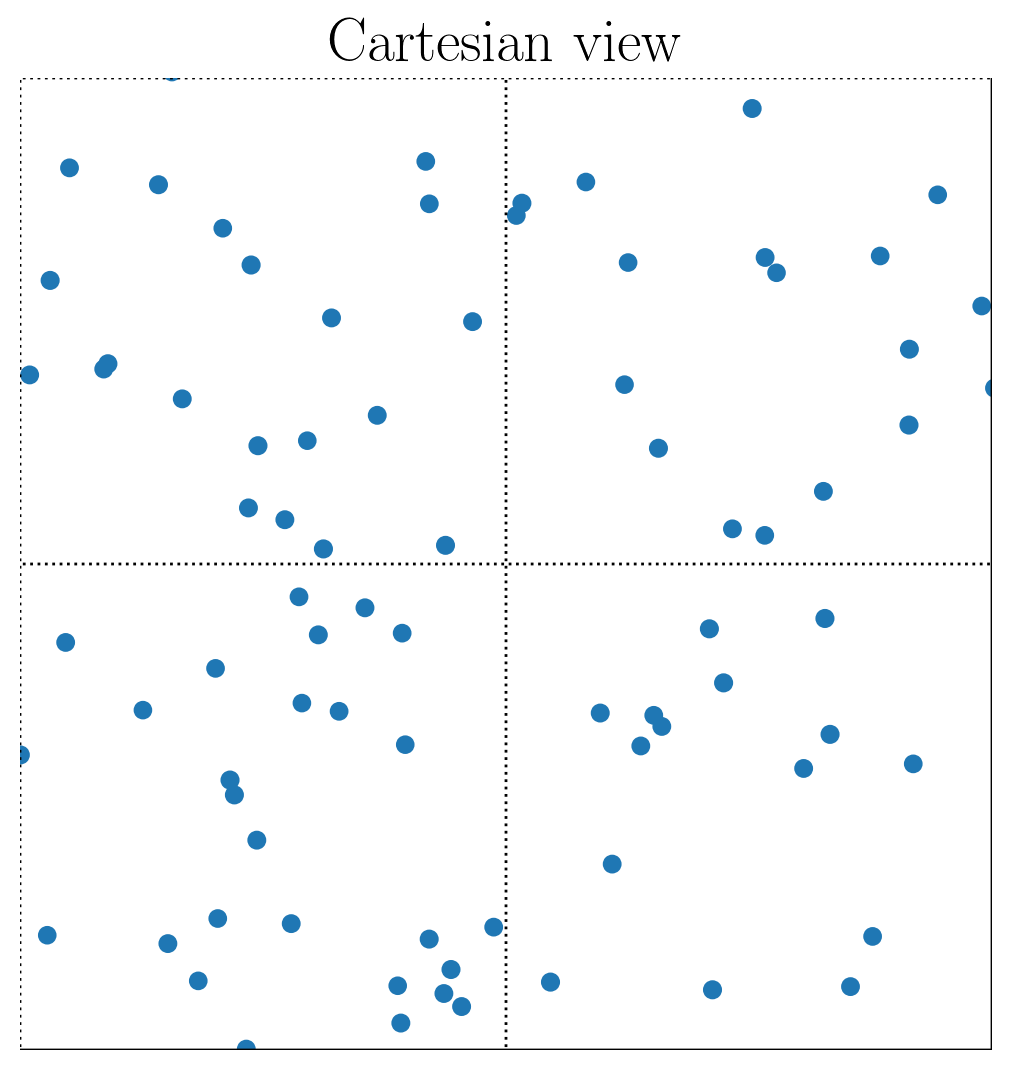

In [168]:
canvas.show_halo_centers("cartview",
                        lonra=[0,60],
                        latra=[0,60],
                        )

The canvas provides methods for finding the pixel number of halo centers, as well as their angular positions in spehrical coordinates

In [169]:
canvas.find_centers_indx()

Done! You can now get the center pixels using Canvas.centers_indx.


In [174]:
canvas.find_centers_ang()

Done! You can now get the angular position of the discs using Canvas.centers_ang.


Similarly you can find the pixels around each halo center using `find_discs_indx(R_times)`. The method finds all the pixels within `R_times` the virial radius of the halo center. 

In [170]:
canvas.find_discs_indx(R_times=1)

Done! You can now get the discs using Canvas.discs_indx.


And `find_discs_ang()` calculates the angular position of each pixel of the discs.

In [171]:
canvas.find_discs_ang()

Done! You can now get the angular position of the discs using Canvas.discs_ang.


Let's check out the discs

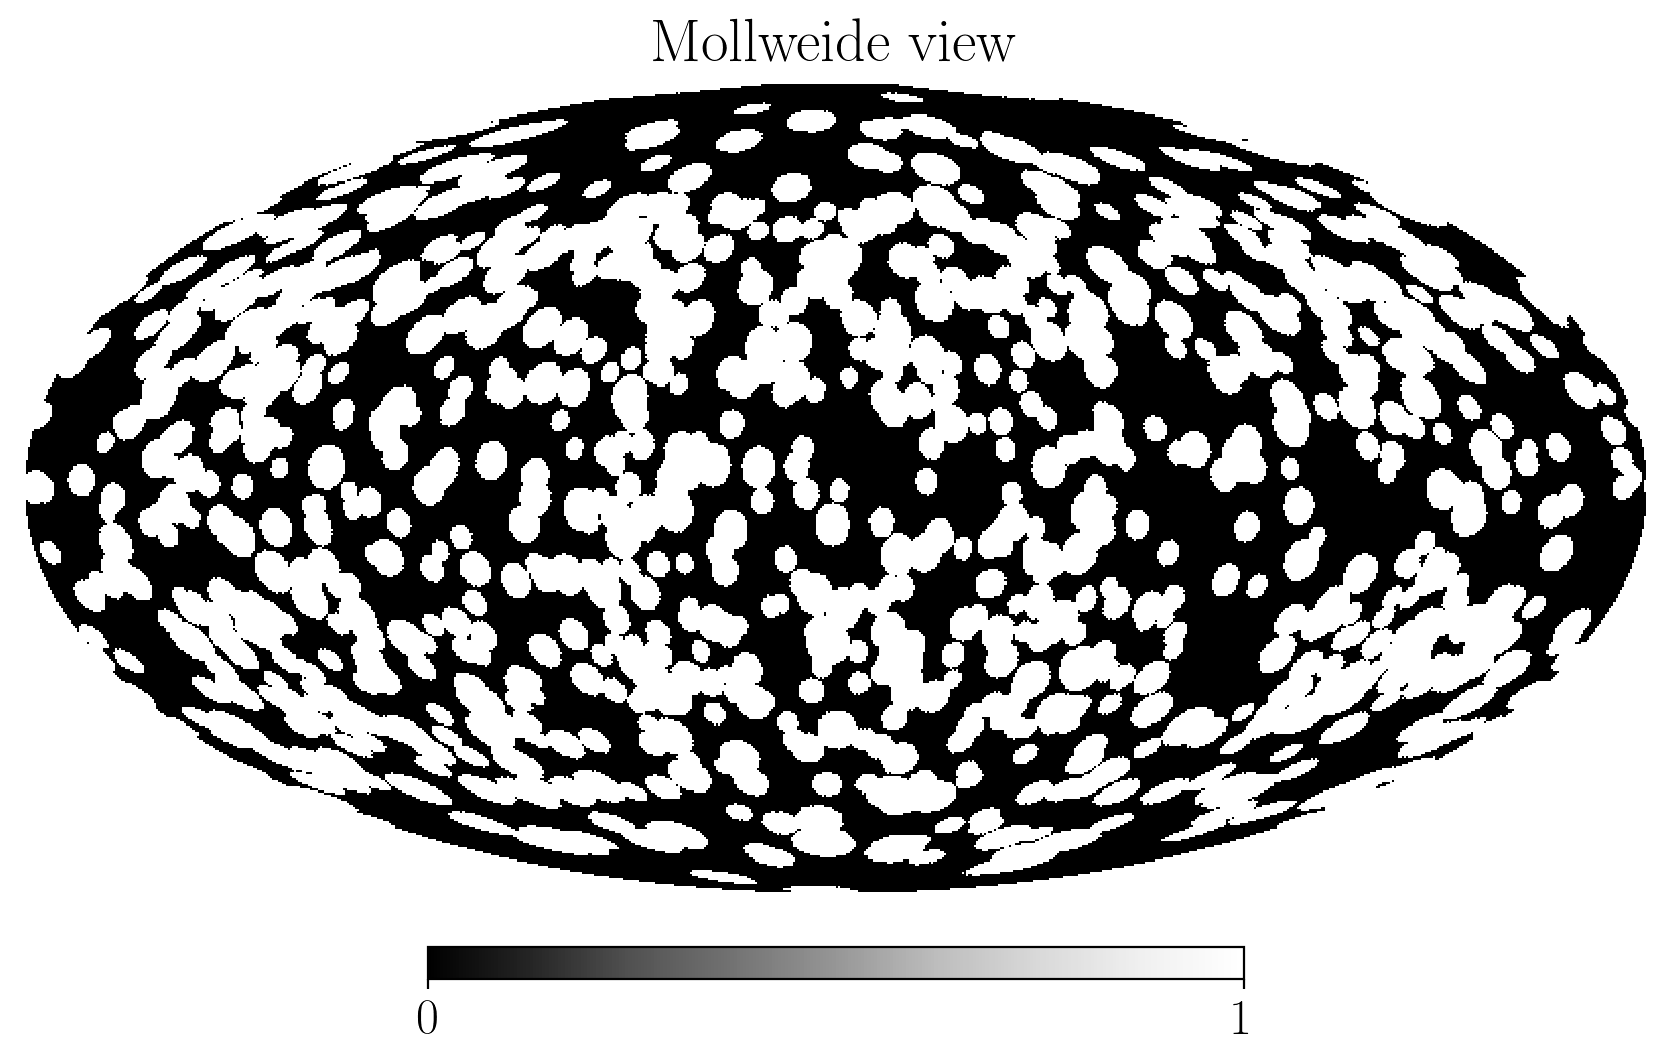

In [172]:
canvas.cmap = cm.Greys_r

canvas.show_discs()

`find_discs_2center_distance()` finds the angular distance of each pixel to the halo center in units of radians and also Mpc. 

In [175]:
canvas.find_discs_2center_distance()

The distances in radians can be accessed via `.discs_2center_rad` and in units of Mpc via `.discs_2center_mpc`.

# Painter

The `Painter` object paints a signal on top of the canvas according to an input template

In [177]:
painter = astropaint.Painter(template=profile.solid_sphere_proj)

The template 'solid_sphere_proj' takes in the following arguments:
['r', 'M_200c', 'R_200c']


In [178]:
# change the color map to RdYlBu
canvas.cmap = cm.RdYlBu_r

If the canvas has been painted on previously, it can be cleaned using `.clean()`

In [179]:
canvas.clean()

The painter paints the signal on the canvas using the `.spray()` method

In [180]:
painter.spray(canvas)

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
Your artwork is fininshed. Check it out with Canvas.show_map()


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


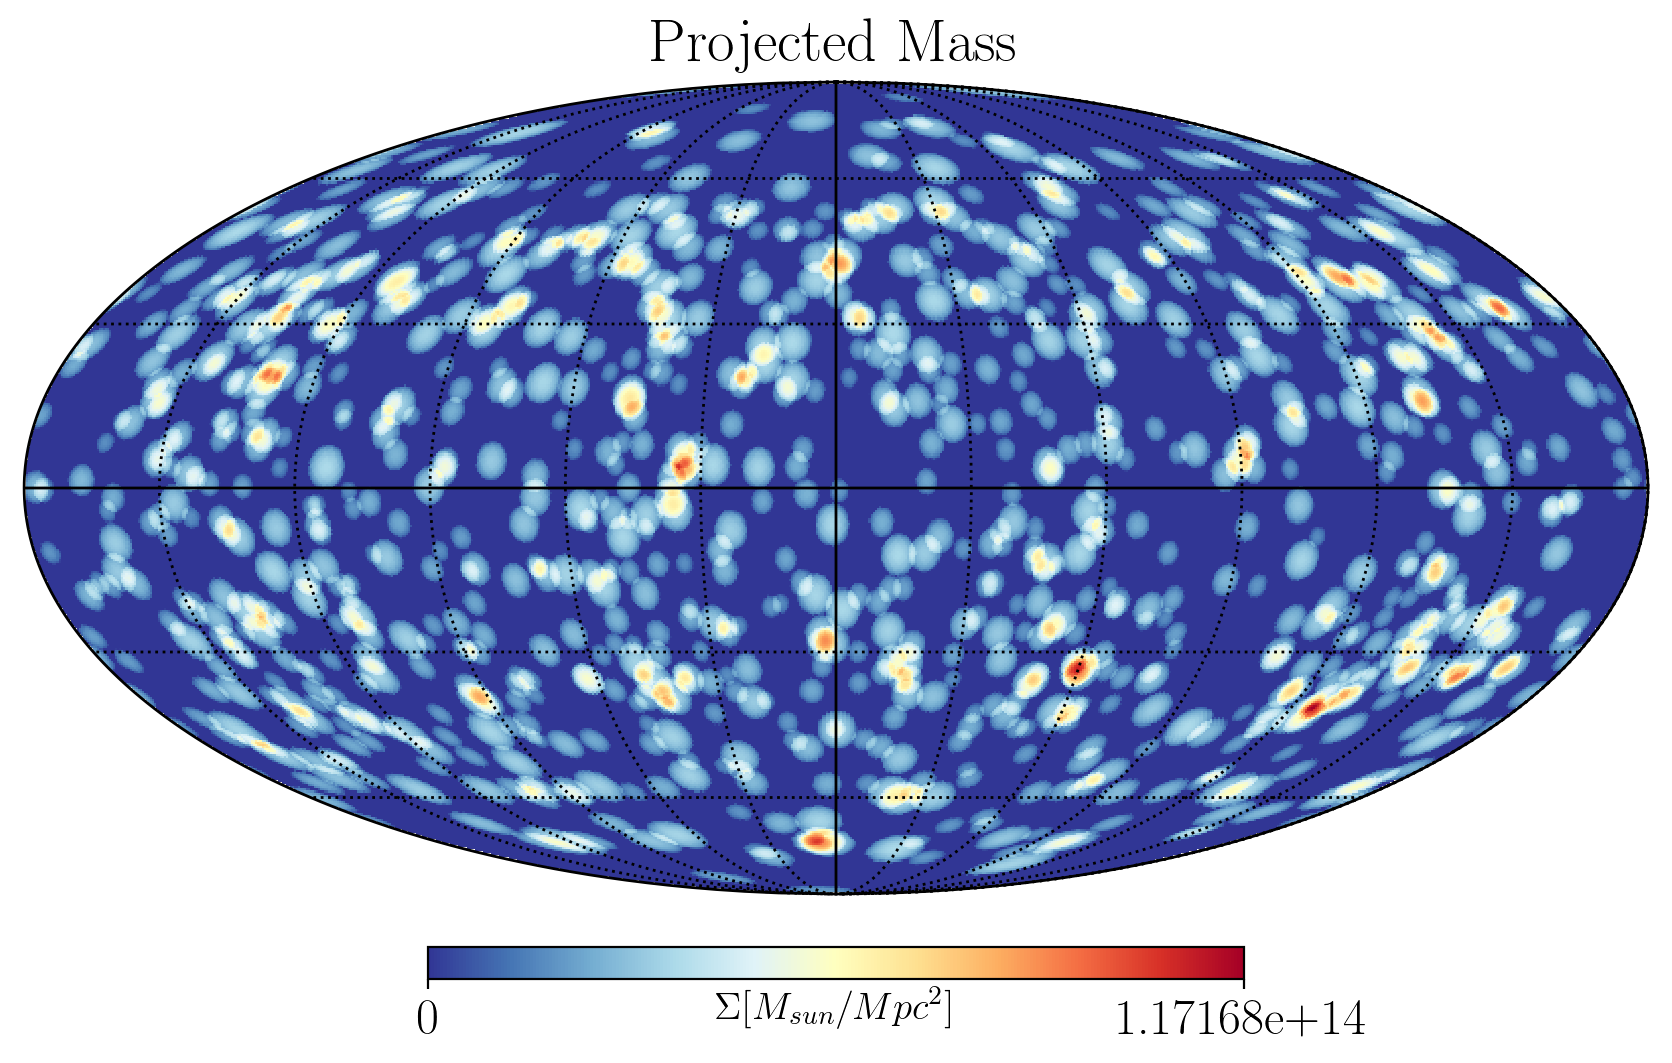

In [195]:
canvas.show_map(projection="mollview",
                title="Projected Mass",
                unit="$\Sigma [M_{sun}/Mpc^2$]")
hp.graticule()

33.59037789072914 116.40962210927087 -27.870395409510863 57.87039540951086
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


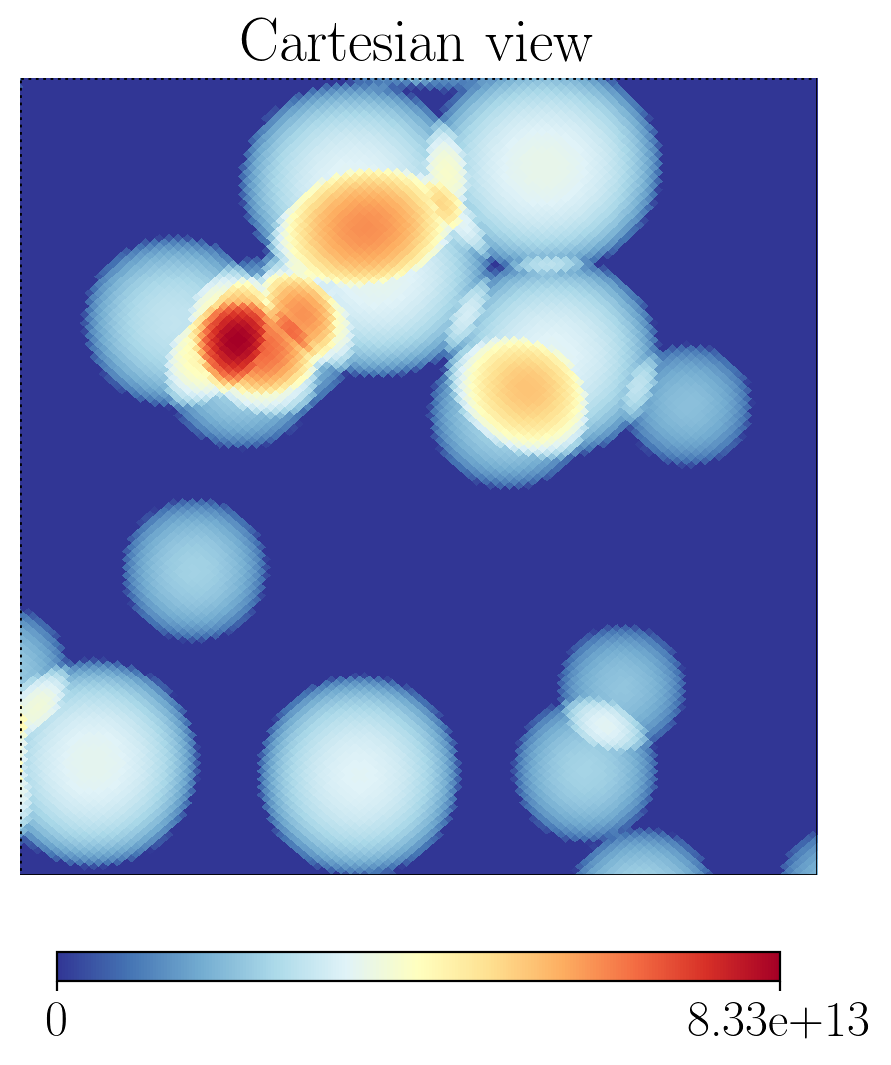

In [182]:
canvas.show_map(projection="cartview",
               lonra=[0,30],
               latra=[0,30])
hp.graticule()


# kinetic Sunyaev Zeldovich (in progress...)

Now let's try to make a more realistic map. We will generate a larger catalog and then paint the kSZ signal over the halos. 

In [6]:
catalog = astropaint.Catalog()
catalog.data = catalog.generate_random_box(n_tot=100000,
                                           box_size=30,
                                           mass_min=1E14,
                                           mass_max=1E15,
                                           put_on_shell=True)

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [7]:
canvas = astropaint.Canvas(catalog,
                           nside=512)

Done! You can now get the center pixels using Canvas.centers_indx.
Done! You can now get the angular position of the discs using Canvas.centers_ang.
Done! You can now get the discs using Canvas.discs_indx.
Done! You can now get the angular position of the discs using Canvas.discs_ang.


In [8]:
kSZ_painter = astropaint.Painter(template=profile.kSZ_T_NFW)
kSZ_painter.spray(canvas)

The template 'kSZ_T_NFW' takes in the following arguments:
['r', 'rho_s', 'R_s', 'v_r']
and the following keyword-only arguments:
['T_cmb']
Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['rho_s', 'R_s', 'v_r'], dtype='object')
Your artwork is fininshed. Check it out with Canvas.show_map()


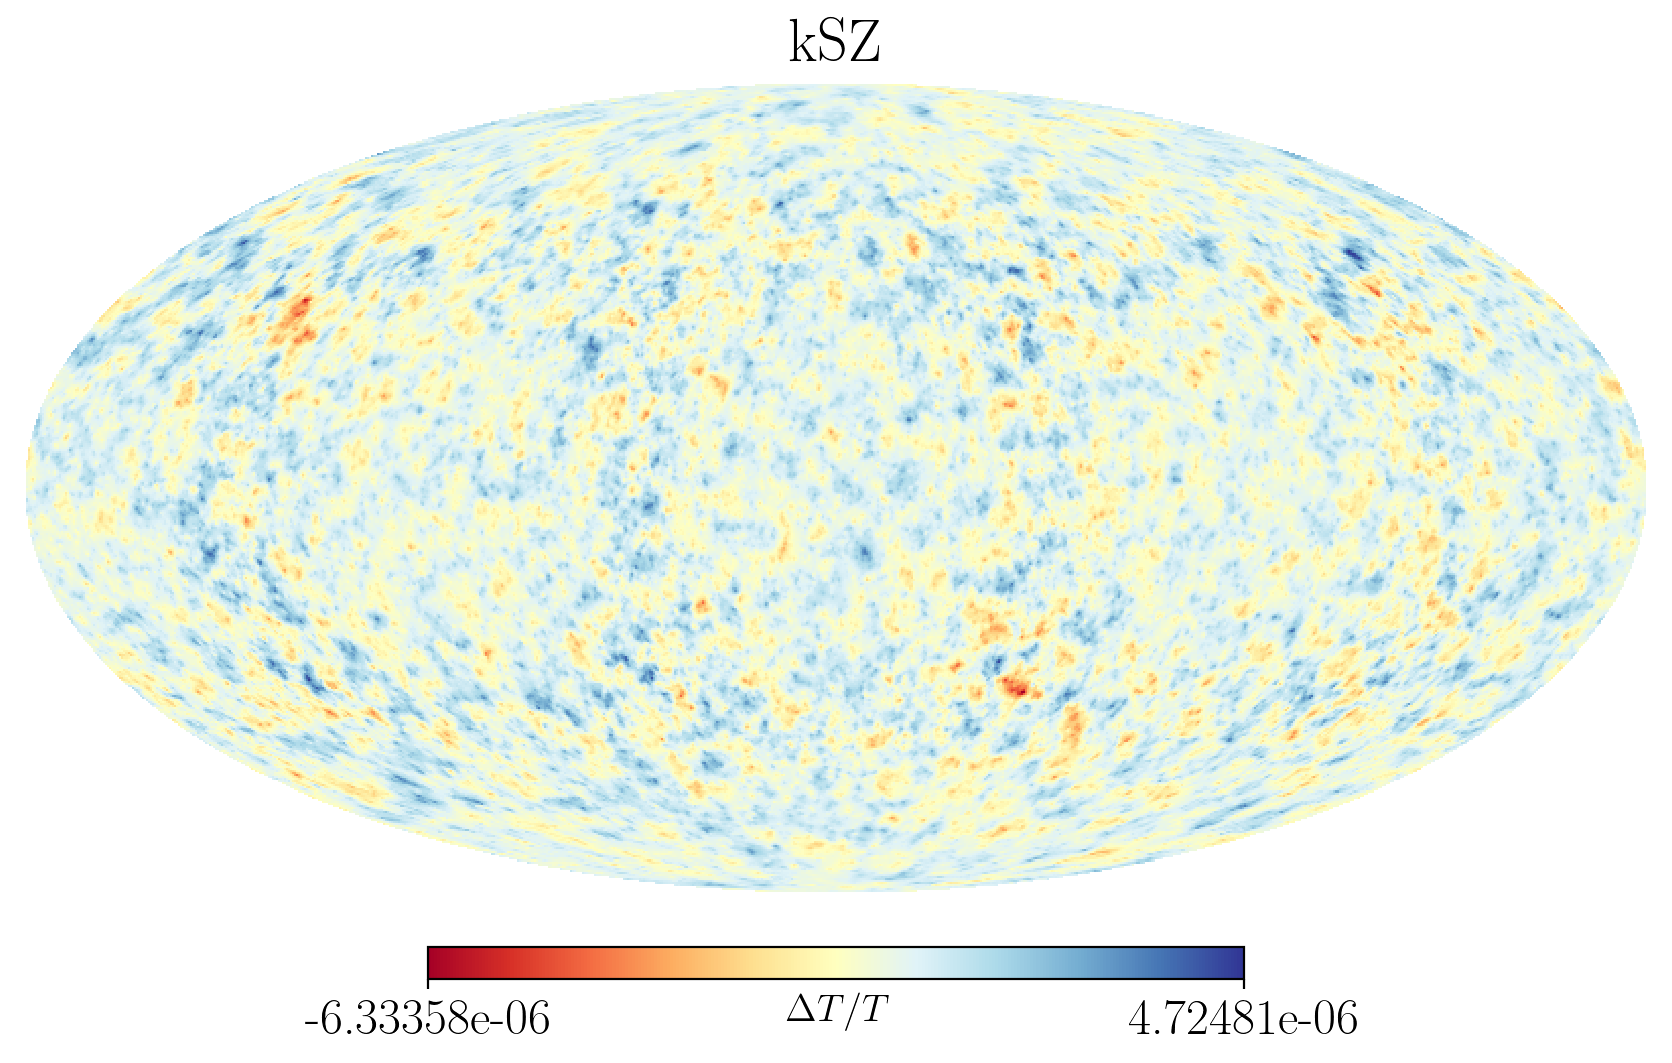

In [17]:
canvas.cmap = cm.RdYlBu
canvas.show_map(title="kSZ",
                unit="$\Delta T/T$")

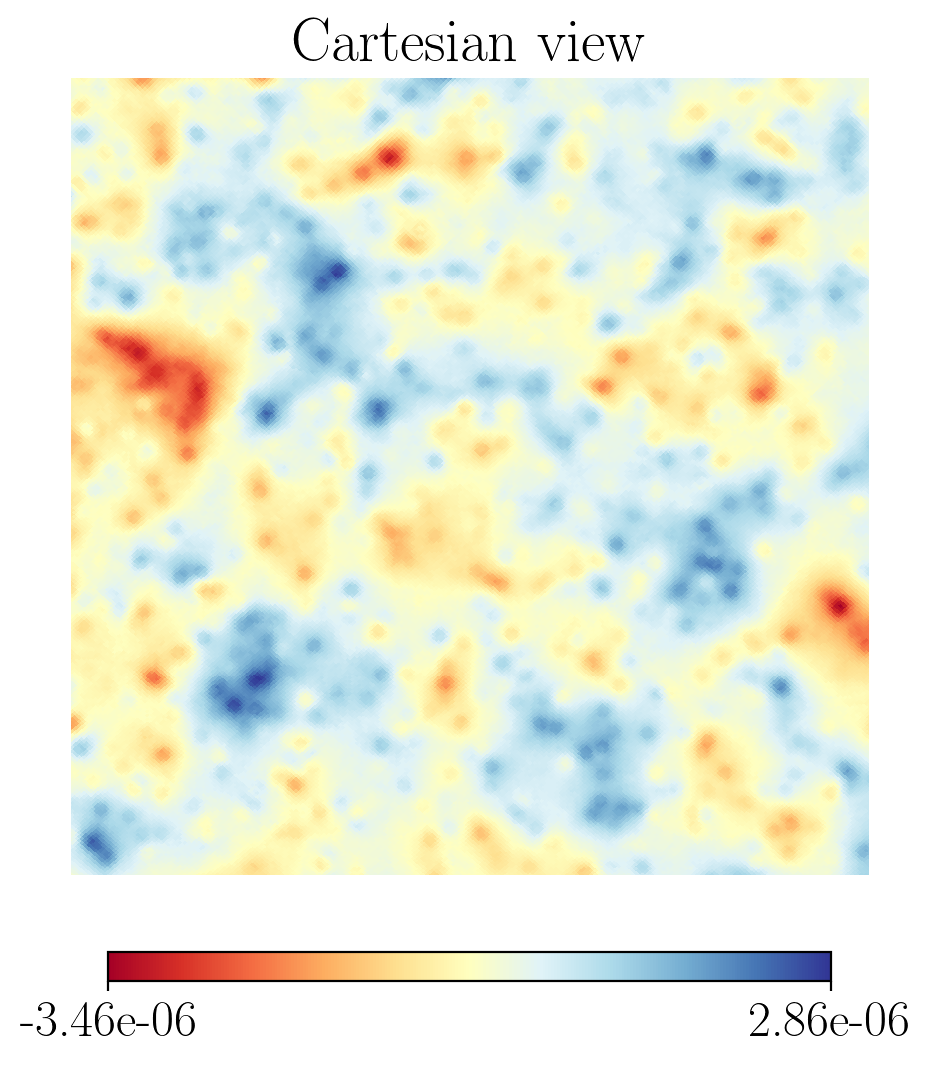

In [13]:
canvas.show_map("cartesian",
               lonra=[0,30],
               latra=[0,30])